In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
df = pd.read_csv('65 Years of Weather Data Bangladesh (1948 - 2013).csv')

In [24]:
df.head()

,No,Station_Names,YEAR,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01
1,1,Barisal,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1950.01
2,2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1951.01
3,3,Barisal,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1952.01
4,4,Barisal,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1953.01


In [25]:
X= df.iloc[:780,[4,5,6,7,9,10]]
y= df.iloc[:780,[8]]

In [27]:
X.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Cloud_Coverage,Bright_Sunshine
0,29.4,12.3,0.0,68.0,0.6,7.831915
1,30.0,14.1,0.0,77.0,0.8,7.831915
2,28.2,12.3,0.0,77.0,0.6,7.831915
3,26.6,12.3,2.0,77.0,1.0,7.831915
4,30.0,13.3,10.0,75.0,1.6,7.831915


<AxesSubplot:>

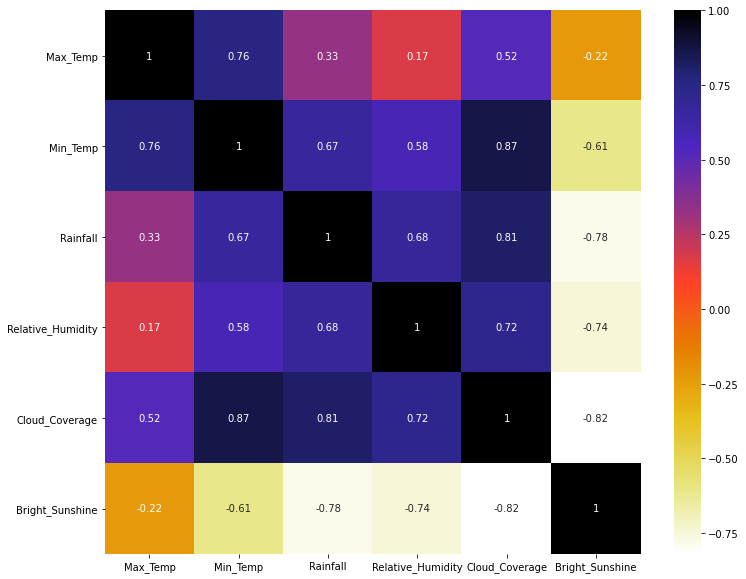

In [28]:
plt.figure(figsize=(12,10))
cor= X.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)

In [119]:
def correlation(df,threshold):
  col_corr=set()
  corr_matrix=df.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])> threshold:
        colname= corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr 

In [120]:
corr_features= correlation(X,0.7)
len(set(corr_features))

3

In [50]:
corr_features

{'Bright_Sunshine', 'Cloud_Coverage', 'Min_Temp'}

In [15]:
## train

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
from sklearn.linear_model import Lasso

# Train the model

lasso = Lasso(alpha=.05)
lasso.fit(X_train,y_train)

y_pred = lasso.predict(X_test)

from sklearn.metrics import r2_score
score= r2_score(y_test,y_pred)
score

0.4661442821058449

In [17]:
train_score= lasso.score(X_test,y_test)
train_score

0.4661442821058449

In [18]:
train_score= lasso.score(X_train,y_train)
train_score

0.42856779668161604

In [29]:
### StandardScaler

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
scaled_data= scaler.transform(X)

In [41]:
scaled_data

array([[-1.49452055, -1.81753645, -0.93841464, -2.22513205, -1.4493125 ,
         0.64629679],
       [-1.26416267, -1.45609381, -0.93841464, -0.80895553, -1.35627022,
         0.64629679],
       [-1.9552363 , -1.81753645, -0.93841464, -0.80895553, -1.4493125 ,
         0.64629679],
       ...,
       [-1.0338048 , -1.41593352, -0.93841464,  0.29251509, -0.61193195,
        -0.51113442],
       [-1.72487842, -1.73721587, -0.93841464,  0.44986804, -1.21670679,
        -0.35555978],
       [-1.45612757, -1.43601367, -0.93841464, -0.0221908 , -1.49583365,
         0.05930594]])

In [30]:
## train with StandardScaler

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(scaled_data,y,test_size=0.2,random_state=0)

In [31]:
from sklearn.linear_model import Lasso

# Train the model

lasso = Lasso(alpha=.05)
lasso.fit(X_train,y_train)

y_pred = lasso.predict(X_test)

from sklearn.metrics import r2_score
score= r2_score(y_test,y_pred)
score

0.4428018956772751

In [32]:
train_score= lasso.score(X_test,y_test)
train_score

0.4428018956772751

In [33]:
### StandardScaler + PCA => lasso

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
scaled_data= scaler.transform(X)

### PCA
from sklearn.decomposition import PCA
pca = PCA (n_components=5)
pca.fit(scaled_data)
x_pca= pca.transform(scaled_data)
x_pca

array([[-3.43063819, -0.57226965,  1.24226984, -0.49472972, -0.02381784],
       [-2.61168828, -0.79355283,  0.1057927 , -0.11046509,  0.16712894],
       [-3.00448369, -1.44983417,  0.19263786, -0.09206161,  0.01381652],
       ...,
       [-1.26270274, -1.40126218, -0.45935852, -0.7376922 ,  0.55071207],
       [-1.88265882, -2.05332977, -0.56593199, -0.46440531,  0.61812653],
       [-2.16725399, -1.42603842, -0.36925326, -0.2597291 ,  0.51166743]])

In [34]:
## train with PCA

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_pca,y,test_size=0.2,random_state=0)

In [35]:
from sklearn.linear_model import Lasso

# Train the model

lasso = Lasso(alpha=.05)
lasso.fit(X_train,y_train)

y_pred = lasso.predict(X_test)

from sklearn.metrics import r2_score
score= r2_score(y_test,y_pred)
score

0.3917276614384969

In [36]:
### PCA
from sklearn.decomposition import PCA
pca = PCA (n_components=5)
pca.fit(X)
xPca= pca.transform(X)
xPca

array([[-1.75878971e+02,  1.20217818e+01, -9.16312827e-01,
         1.72076009e+00,  8.27270423e-01],
       [-1.75635760e+02,  3.43924335e+00, -3.75591794e+00,
         1.62925038e-01,  1.93660288e-01],
       [-1.75677875e+02,  4.58336170e+00, -5.94872470e+00,
         7.32230224e-01, -4.78613841e-02],
       ...,
       [-1.75435892e+02, -3.20333857e+00, -6.64803134e+00,
         7.11013722e-02,  2.25167129e+00],
       [-1.75464160e+02, -2.77692226e+00, -9.31894050e+00,
        -5.71729922e-02,  1.40148003e+00],
       [-1.75515176e+02, -8.46027766e-01, -6.48925725e+00,
        -4.51209011e-02,  5.23782940e-01]])

In [37]:
## train with PCA

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(xPca,y,test_size=0.2,random_state=0)

In [38]:
from sklearn.linear_model import Lasso

# Train the model

lasso = Lasso(alpha=.05)
lasso.fit(X_train,y_train)

y_pred = lasso.predict(X_test)

from sklearn.metrics import r2_score
score= r2_score(y_test,y_pred)
score

0.39395875787885926

In [39]:
train_score= lasso.score(X_test,y_test)
train_score

0.39395875787885926

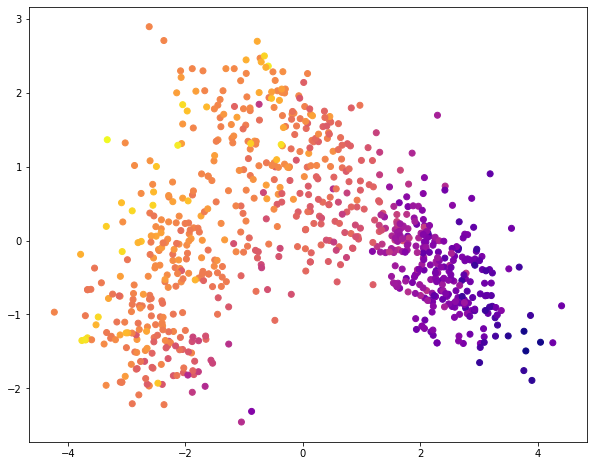

In [40]:
plt.figure (figsize=(10,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=X["Bright_Sunshine"],cmap="plasma")

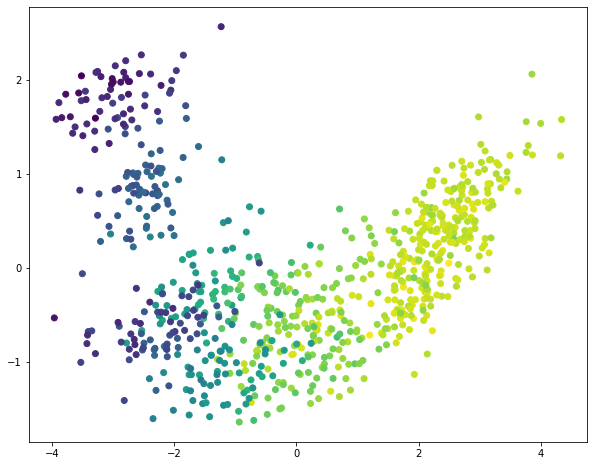

In [111]:
plt.figure (figsize=(10,8))
plt.scatter(x_pca[:,0],x_pca[:,2],c=X["Min_Temp"])